## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import seaborn as sns

In [2]:
# Creating a dictionary of file names and df names to faciliate importing

# datasets_dict = {'bom.movie_gross':'bom_movie_gross','imdb.name.basics':'imdb_name_basics',
#                  'imdb.title.akas':'imdb_title_akas','imdb.title.basics':'imdb_title_basics',
#                  'imdb.title.crew':'imdb_title_crew','imdb.title.principals':'imdb_title_principals',
#                  'imdb.title.ratings':'imdb_title_ratings','tmdb.movies':'tmdb_movies',
#                  'tn.movie_budgets':'tn_movie_budgets'}

# def import_datasets(key, value):
#     value = pd.read_csv(f'./zippedData/{key}.csv.gz', compression='gzip', 
#                                  header=0, sep=',', quotechar='"')
#     return value
 
# for key, value in datasets_dict.items():
#     import_datasets(key, value)    

9 `CSV` datasets

In [3]:
bom_movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz', compression='gzip', 
                                 header=0, sep=',', quotechar='"')
imdb_name_basics = pd.read_csv('zippedData/imdb.name.basics.csv.gz', compression='gzip', 
                                 header=0, sep=',', quotechar='"')
imdb_title_akas = pd.read_csv('zippedData/imdb.title.akas.csv.gz', compression='gzip', 
                                 header=0, sep=',', quotechar='"')
imdb_title_basics = pd.read_csv('zippedData/imdb.title.basics.csv.gz', compression='gzip', 
                                 header=0, sep=',', quotechar='"')
imdb_title_crew = pd.read_csv('zippedData/imdb.title.crew.csv.gz', compression='gzip', 
                                 header=0, sep=',', quotechar='"')
imdb_title_principals = pd.read_csv('zippedData/imdb.title.principals.csv.gz', compression='gzip', 
                                 header=0, sep=',', quotechar='"')
imdb_title_ratings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz', compression='gzip', 
                                 header=0, sep=',', quotechar='"')
tmdb_movies = pd.read_csv('zippedData/tmdb.movies.csv.gz', compression='gzip', 
                                 header=0, sep=',', quotechar='"')
tn_movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz', compression='gzip', 
                                 header=0, sep=',', quotechar='"')

2 `TSV` datasets

In [4]:
rt_movie_info = pd.read_csv('zippedData/rt.movie_info.tsv.gz', compression='gzip', 
                                 header=0, sep='\t', encoding='ISO-8859-1', quotechar='"')

rt_reviews = pd.read_csv('zippedData/rt.reviews.tsv.gz', compression='gzip', 
                                 header=0, sep='\t', encoding='ISO-8859-1', quotechar='"')

## EDA on `bom_movie_gross`

In [5]:
bom_movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


### Info 
#### Missing Values
* ~ 1300 missing in Foreign Gross and convert to float
* ~ 30 in domestic gross (already float)
* Studio is missing 5 values, may not be important

In [6]:
bom_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


Set _index_ to movie title

In [7]:
bom_movie_gross.set_index(['title'], inplace=True)

__Domestic Gross__ 
_Top 5_

Divide column by 1 million to makes totals easier to evaluate

In [8]:
bom_movie_gross['domestic_gross_mm'] = bom_movie_gross['domestic_gross'] / 1000000

In [9]:
bom_movie_gross.sort_values(by='domestic_gross_mm', ascending=False)[:5]

,studio,domestic_gross,foreign_gross,year,domestic_gross_mm
title,,,,,
Star Wars: The Force Awakens,BV,936700000.0,"1,131.6",2015,936.7
Black Panther,BV,700100000.0,646900000,2018,700.1
Avengers: Infinity War,BV,678800000.0,"1,369.5",2018,678.8
Jurassic World,Uni.,652300000.0,"1,019.4",2015,652.3
Marvel's The Avengers,BV,623400000.0,895500000,2012,623.4


If over 1 billion, total is annotated as such `"1,131.6"` see foreign gross for Star Wars from [Box Office Mojo](https://www.boxofficemojo.com/title/tt2488496/?ref_=bo_se_r_8).

__Foreign Gross__

_Cannot sort because dtype is object_

Additionally, scale needs to be adjusted, to the same way `domestic_gross` is annotated, so that data can be analyzed on the same scale. 

In [10]:
bom_movie_gross.sort_values(by='foreign_gross', ascending=False)[:5]

,studio,domestic_gross,foreign_gross,year,domestic_gross_mm
title,,,,,
Life's a Breeze,Magn.,3500.0,99700,2014,0.0035
The East,FoxS,2300000.0,99700,2013,2.3000
White Lion,Scre.,NaN,99600,2010,NaN
A United Kingdom,FoxS,3900000.0,9900000,2017,3.9000
Le Havre,Jan.,612000.0,9900000,2011,0.6120


_These are the 5 films that had foreign gross > 1 billion_

In [11]:
# filter foreign gross over 1 billion
bill_filt = bom_movie_gross['foreign_gross'].str.contains(',', na=False)
bom_movie_gross[bill_filt]

,studio,domestic_gross,foreign_gross,year,domestic_gross_mm
title,,,,,
Star Wars: The Force Awakens,BV,936700000.0,"1,131.6",2015,936.7
Jurassic World,Uni.,652300000.0,"1,019.4",2015,652.3
Furious 7,Uni.,353000000.0,"1,163.0",2015,353.0
The Fate of the Furious,Uni.,226000000.0,"1,010.0",2017,226.0
Avengers: Infinity War,BV,678800000.0,"1,369.5",2018,678.8


#### Create Python Script
* Checks if value is a string 
* If True, check for comma. 
* If True remove comma and convert to float. 
* If False, return float and divide by 1 million 
* Otherwise the value is numeric.

Once column is converted to floats all in the same decimal level, then they can be divided by 1 million to get correct scalling of foreign_gross. 

This function could be called clean_convert_gross.

In [12]:
from clean_data import *

In [13]:
bom_movie_gross['foreign_gross_mm'] = bom_movie_gross['foreign_gross'].apply(clean_convert_gross)

In [14]:
bom_movie_gross.head()

,studio,domestic_gross,foreign_gross,year,domestic_gross_mm,foreign_gross_mm
title,,,,,,
Toy Story 3,BV,415000000.0,652000000,2010,415.0,652.0
Alice in Wonderland (2010),BV,334200000.0,691300000,2010,334.2,691.3
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010,296.0,664.3
Inception,WB,292600000.0,535700000,2010,292.6,535.7
Shrek Forever After,P/DW,238700000.0,513900000,2010,238.7,513.9


Sort by new column `foreign_gross_mm` to get top 5 foreign gross.

In [15]:
bom_movie_gross.sort_values(by='foreign_gross_mm', ascending=False)[:5]

,studio,domestic_gross,foreign_gross,year,domestic_gross_mm,foreign_gross_mm
title,,,,,,
Avengers: Infinity War,BV,678800000.0,"1,369.5",2018,678.8,1369.5
Furious 7,Uni.,353000000.0,"1,163.0",2015,353.0,1163.0
Star Wars: The Force Awakens,BV,936700000.0,"1,131.6",2015,936.7,1131.6
Jurassic World,Uni.,652300000.0,"1,019.4",2015,652.3,1019.4
The Fate of the Furious,Uni.,226000000.0,"1,010.0",2017,226.0,1010.0


Create a `total_gross` column

In [16]:
bom_movie_gross['total_gross'] = bom_movie_gross['domestic_gross_mm'] + bom_movie_gross['foreign_gross_mm']

In [17]:
bom_movie_gross.sort_values(by='total_gross', ascending=False)[:5]

,studio,domestic_gross,foreign_gross,year,domestic_gross_mm,foreign_gross_mm,total_gross
title,,,,,,,
Star Wars: The Force Awakens,BV,936700000.0,"1,131.6",2015,936.7,1131.6,2068.3
Avengers: Infinity War,BV,678800000.0,"1,369.5",2018,678.8,1369.5,2048.3
Jurassic World,Uni.,652300000.0,"1,019.4",2015,652.3,1019.4,1671.7
Marvel's The Avengers,BV,623400000.0,895500000,2012,623.4,895.5,1518.9
Furious 7,Uni.,353000000.0,"1,163.0",2015,353.0,1163.0,1516.0


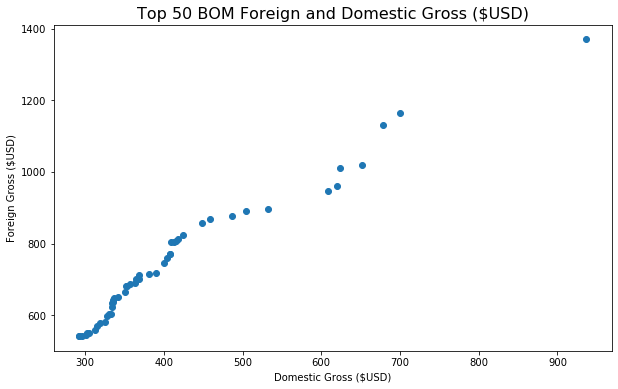

In [18]:
# plot a basic graph showing top 50 total grossing movies
x = bom_movie_gross['domestic_gross_mm'].sort_values(ascending=False)[:50]
y = bom_movie_gross['foreign_gross_mm'].sort_values(ascending=False)[:50]

plt.figure(figsize=(10,6))

plt.scatter(x, y)
plt.xlabel('Domestic Gross ($USD)')
plt.ylabel('Foreign Gross ($USD)')
plt.title('Top 50 BOM Foreign and Domestic Gross ($USD)', fontsize=16)
plt.show();

### Categorizing the genre variable in the IMDB dataset.  The original genres classification contained 1085 
### unique classifications.  These are combinations of certain basic classifications.  Here creating non-mutually 
### exclusive genre classifications.

In [19]:
imdb_title_basics['genres'].nunique()

1085

In [20]:
imdb_title_basics['genres']

0           Action,Crime,Drama
1              Biography,Drama
2                        Drama
3                 Comedy,Drama
4         Comedy,Drama,Fantasy
                  ...         
146139                   Drama
146140             Documentary
146141                  Comedy
146142                     NaN
146143             Documentary
Name: genres, Length: 146144, dtype: object

In [21]:
#creating a list of all genres
list_of_genres = list(imdb_title_basics['genres'])

#python is interpreting nan as a float which prevents us iterating over this entries with string methods
# imdb_title_basics['genres'].isna().sum()
#Using the isinstance to get around this problem
list_of_genres2 = []

for a in range(0, len(list_of_genres)):
    if isinstance(list_of_genres[a], str):
        list_of_genres2.append(list_of_genres[a])

#Multiple entries are seperated by commas. Using split function to make each genre an individual entry.
list_of_genres3 = []
for a in range(0, len(list_of_genres2)):
    list_of_genres3.extend(list_of_genres2[a].split(','))

#Using set function to get the list of unique genres    
unique_genres = set(list_of_genres3)

unique_genres

{'Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Talk-Show',
 'Thriller',
 'War',
 'Western'}

In [22]:
#Using the unique_genres list to create the non-mutually exclusive variables

for genre in unique_genres:
    imdb_title_basics[f'{genre}_movie'] = imdb_title_basics['genres'].str.contains(f'{genre}')

In [23]:
imdb_title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,Drama_movie,Reality-TV_movie,History_movie,Horror_movie,...,Comedy_movie,Short_movie,Fantasy_movie,Thriller_movie,Mystery_movie,Music_movie,Talk-Show_movie,Sci-Fi_movie,Biography_movie,Crime_movie
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",True,False,False,False,...,True,False,True,False,False,False,False,False,False,False


Merge IMDB_title_basics with BOM_movie_gross

In [24]:
imdb_title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 33 columns):
tconst               146144 non-null object
primary_title        146144 non-null object
original_title       146123 non-null object
start_year           146144 non-null int64
runtime_minutes      114405 non-null float64
genres               140736 non-null object
Drama_movie          140736 non-null object
Reality-TV_movie     140736 non-null object
History_movie        140736 non-null object
Horror_movie         140736 non-null object
Game-Show_movie      140736 non-null object
Romance_movie        140736 non-null object
Adult_movie          140736 non-null object
Action_movie         140736 non-null object
News_movie           140736 non-null object
Western_movie        140736 non-null object
Documentary_movie    140736 non-null object
Sport_movie          140736 non-null object
War_movie            140736 non-null object
Family_movie         140736 non-null object
Adventure

In [25]:
bom_movie_gross.reset_index(inplace=True)

In [26]:
imdb_title_basics.sort_values(by='primary_title')

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,Drama_movie,Reality-TV_movie,History_movie,Horror_movie,...,Comedy_movie,Short_movie,Fantasy_movie,Thriller_movie,Mystery_movie,Music_movie,Talk-Show_movie,Sci-Fi_movie,Biography_movie,Crime_movie
13871,tt1699720,!Women Art Revolution,Women Art Revolution,2010,83.0,Documentary,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
37039,tt2346170,#1 Serial Killer,#1 Serial Killer,2013,87.0,Horror,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
52892,tt3120962,#5,#5,2013,68.0,"Biography,Comedy,Fantasy",False,False,False,False,...,True,False,True,False,False,False,False,False,True,False
131857,tt8219776,#5,#5,2018,NaN,Documentary,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
77936,tt4470336,#50Fathers,#50Fathers,2015,132.0,Comedy,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61849,tt3566826,è solo questione di punti di vista,è solo questione di punti di vista,2012,103.0,"Action,Adventure,Comedy",False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
61401,tt3547074,è solo questione di tempo,è solo questione di tempo,2013,72.0,Comedy,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
139058,tt8976950,élèctions piege à cons,élèctions piege à cons,2014,NaN,Comedy,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
102502,tt5997078,împetu,împetu,2017,NaN,Documentary,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


titles in the imdb dataset were duplicated; merging on title and year to correctly merge with corresponding gross in the BOM movie dataset

In [27]:
bom_gross_title_basics = pd.merge(bom_movie_gross, imdb_title_basics, how='left', 
                                  left_on=['title','year'], right_on=['primary_title','start_year'])

In [28]:
bom_gross_title_basics.head()

,title,studio,domestic_gross,foreign_gross,year,domestic_gross_mm,foreign_gross_mm,total_gross,tconst,primary_title,...,Comedy_movie,Short_movie,Fantasy_movie,Thriller_movie,Mystery_movie,Music_movie,Talk-Show_movie,Sci-Fi_movie,Biography_movie,Crime_movie
0,Toy Story 3,BV,415000000.0,652000000,2010,415.0,652.0,1067.0,tt0435761,Toy Story 3,...,True,False,False,False,False,False,False,False,False,False
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010,334.2,691.3,1025.5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010,296.0,664.3,960.3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Inception,WB,292600000.0,535700000,2010,292.6,535.7,828.3,tt1375666,Inception,...,False,False,False,False,False,False,False,True,False,False
4,Shrek Forever After,P/DW,238700000.0,513900000,2010,238.7,513.9,752.6,tt0892791,Shrek Forever After,...,True,False,False,False,False,False,False,False,False,False


In [29]:
bom_gross_title_basics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3427 entries, 0 to 3426
Data columns (total 41 columns):
title                3427 non-null object
studio               3422 non-null object
domestic_gross       3399 non-null float64
foreign_gross        2061 non-null object
year                 3427 non-null int64
domestic_gross_mm    3399 non-null float64
foreign_gross_mm     2061 non-null float64
total_gross          2033 non-null float64
tconst               1873 non-null object
primary_title        1873 non-null object
original_title       1873 non-null object
start_year           1873 non-null float64
runtime_minutes      1863 non-null float64
genres               1871 non-null object
Drama_movie          1871 non-null object
Reality-TV_movie     1871 non-null object
History_movie        1871 non-null object
Horror_movie         1871 non-null object
Game-Show_movie      1871 non-null object
Romance_movie        1871 non-null object
Adult_movie          1871 non-null object
Action

In [30]:
bom_gross_title_basics_ratings = pd.merge(bom_gross_title_basics, imdb_title_ratings, how='left', 
                                  left_on='tconst', right_on='tconst')

In [31]:
bom_gross_title_basics_ratings.head()

,title,studio,domestic_gross,foreign_gross,year,domestic_gross_mm,foreign_gross_mm,total_gross,tconst,primary_title,...,Fantasy_movie,Thriller_movie,Mystery_movie,Music_movie,Talk-Show_movie,Sci-Fi_movie,Biography_movie,Crime_movie,averagerating,numvotes
0,Toy Story 3,BV,415000000.0,652000000,2010,415.0,652.0,1067.0,tt0435761,Toy Story 3,...,False,False,False,False,False,False,False,False,8.3,682218.0
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010,334.2,691.3,1025.5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010,296.0,664.3,960.3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Inception,WB,292600000.0,535700000,2010,292.6,535.7,828.3,tt1375666,Inception,...,False,False,False,False,False,True,False,False,8.8,1841066.0
4,Shrek Forever After,P/DW,238700000.0,513900000,2010,238.7,513.9,752.6,tt0892791,Shrek Forever After,...,False,False,False,False,False,False,False,False,6.3,167532.0


### Bivariable analysis of gross profit by genre

In [32]:
bom_gross_title_basics_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3427 entries, 0 to 3426
Data columns (total 43 columns):
title                3427 non-null object
studio               3422 non-null object
domestic_gross       3399 non-null float64
foreign_gross        2061 non-null object
year                 3427 non-null int64
domestic_gross_mm    3399 non-null float64
foreign_gross_mm     2061 non-null float64
total_gross          2033 non-null float64
tconst               1873 non-null object
primary_title        1873 non-null object
original_title       1873 non-null object
start_year           1873 non-null float64
runtime_minutes      1863 non-null float64
genres               1871 non-null object
Drama_movie          1871 non-null object
Reality-TV_movie     1871 non-null object
History_movie        1871 non-null object
Horror_movie         1871 non-null object
Game-Show_movie      1871 non-null object
Romance_movie        1871 non-null object
Adult_movie          1871 non-null object
Action

In [33]:
print(bom_gross_title_basics_ratings['domestic_gross_mm'].mean())
print(bom_gross_title_basics_ratings['domestic_gross_mm'].median())

28.682456922035893
1.4


Checking number of observations from 2015 onwards

In [34]:
bom_gross_title_basics_ratings[bom_gross_title_basics_ratings['year'] > 2014]

,title,studio,domestic_gross,foreign_gross,year,domestic_gross_mm,foreign_gross_mm,total_gross,tconst,primary_title,...,Fantasy_movie,Thriller_movie,Mystery_movie,Music_movie,Talk-Show_movie,Sci-Fi_movie,Biography_movie,Crime_movie,averagerating,numvotes
1888,Star Wars: The Force Awakens,BV,936700000.0,"1,131.6",2015,936.7000,1131.6,2068.3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1889,Jurassic World,Uni.,652300000.0,"1,019.4",2015,652.3000,1019.4,1671.7,tt0369610,Jurassic World,...,False,False,False,False,False,True,False,False,7.0,539338.0
1890,Furious 7,Uni.,353000000.0,"1,163.0",2015,353.0000,1163.0,1516.0,tt2820852,Furious 7,...,False,True,False,False,False,False,False,True,7.2,335074.0
1891,Avengers: Age of Ultron,BV,459000000.0,946400000,2015,459.0000,946.4,1405.4,tt2395427,Avengers: Age of Ultron,...,False,False,False,False,False,True,False,False,7.3,665594.0
1892,Minions,Uni.,336000000.0,823400000,2015,336.0000,823.4,1159.4,tt2293640,Minions,...,False,False,False,False,False,False,False,False,6.4,193917.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3422,The Quake,Magn.,6200.0,NaN,2018,0.0062,NaN,NaN,tt6523720,The Quake,...,False,True,False,False,False,False,False,False,6.2,5270.0
3423,Edward II (2018 re-release),FM,4800.0,NaN,2018,0.0048,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3424,El Pacto,Sony,2500.0,NaN,2018,0.0025,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3425,The Swan,Synergetic,2400.0,NaN,2018,0.0024,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
bom_gross_title_basics_ratings.groupby(['Sci-Fi_movie'])['domestic_gross_mm'].mean()[1]

132.72634906481483

In [36]:
unique_genres = list(unique_genres)

In [37]:
unique_genres

['Drama',
 'Reality-TV',
 'History',
 'Horror',
 'Game-Show',
 'Romance',
 'Adult',
 'Action',
 'News',
 'Western',
 'Documentary',
 'Sport',
 'War',
 'Family',
 'Adventure',
 'Musical',
 'Animation',
 'Comedy',
 'Short',
 'Fantasy',
 'Thriller',
 'Mystery',
 'Music',
 'Talk-Show',
 'Sci-Fi',
 'Biography',
 'Crime']

In [38]:
for genre in unique_genres:
    print(bom_gross_title_basics_ratings[f'''{genre}_movie'''].value_counts())

True     968
False    903
Name: Drama_movie, dtype: int64
False    1871
Name: Reality-TV_movie, dtype: int64
False    1797
True       74
Name: History_movie, dtype: int64
False    1723
True      148
Name: Horror_movie, dtype: int64
False    1871
Name: Game-Show_movie, dtype: int64
False    1571
True      300
Name: Romance_movie, dtype: int64
False    1871
Name: Adult_movie, dtype: int64
False    1348
True      523
Name: Action_movie, dtype: int64
False    1870
True        1
Name: News_movie, dtype: int64
False    1860
True       11
Name: Western_movie, dtype: int64
False    1756
True      115
Name: Documentary_movie, dtype: int64
False    1836
True       35
Name: Sport_movie, dtype: int64
False    1847
True       24
Name: War_movie, dtype: int64
False    1789
True       82
Name: Family_movie, dtype: int64
False    1508
True      363
Name: Adventure_movie, dtype: int64
False    1859
True       12
Name: Musical_movie, dtype: int64
False    1757
True      114
Name: Animation_movie, dtype:

Due to a lack of data the following categories will no longer be considered for analysis: News_movie, Talk-Show_movie, Game-Show_movie, Short_movie, Adult_movie, Reality-TV_movie

We will proceed with Western_movie and Musical_movie (11 and 12 observations respectively) 

In [39]:
for genre in unique_genres:
    print(bom_gross_title_basics_ratings.loc[bom_gross_title_basics_ratings['year'] > 2014, f'''{genre}_movie'''].value_counts())

True     454
False    403
Name: Drama_movie, dtype: int64
False    857
Name: Reality-TV_movie, dtype: int64
False    805
True      52
Name: History_movie, dtype: int64
False    786
True      71
Name: Horror_movie, dtype: int64
False    857
Name: Game-Show_movie, dtype: int64
False    746
True     111
Name: Romance_movie, dtype: int64
False    857
Name: Adult_movie, dtype: int64
False    611
True     246
Name: Action_movie, dtype: int64
False    857
Name: News_movie, dtype: int64
False    855
True       2
Name: Western_movie, dtype: int64
False    804
True      53
Name: Documentary_movie, dtype: int64
False    843
True      14
Name: Sport_movie, dtype: int64
False    845
True      12
Name: War_movie, dtype: int64
False    833
True      24
Name: Family_movie, dtype: int64
False    681
True     176
Name: Adventure_movie, dtype: int64
False    853
True       4
Name: Musical_movie, dtype: int64
False    799
True      58
Name: Animation_movie, dtype: int64
False    582
True     275
Name: Com

Restricting by year 2015 or later Westerns and Musicals only have 2 and 4 observations.  Will additionally exclude these categories from analysis

Sport_movie only has 14 observations and War_movie 12 but will include for now.

In [40]:
unique_genres_analysis = unique_genres

In [41]:
unique_genres_analysis.remove('News')
unique_genres_analysis.remove('Talk-Show')
unique_genres_analysis.remove('Game-Show')
unique_genres_analysis.remove('Short')
unique_genres_analysis.remove('Adult')
unique_genres_analysis.remove('Western')
unique_genres_analysis.remove('Musical')
unique_genres_analysis.remove('Reality-TV')

In [42]:
unique_genres_analysis

['Drama',
 'History',
 'Horror',
 'Romance',
 'Action',
 'Documentary',
 'Sport',
 'War',
 'Family',
 'Adventure',
 'Animation',
 'Comedy',
 'Fantasy',
 'Thriller',
 'Mystery',
 'Music',
 'Sci-Fi',
 'Biography',
 'Crime']

In [43]:
# mean_gross_by_genre = []
for genre in unique_genres_analysis:
    a = bom_gross_title_basics_ratings.groupby([f'{genre}_movie'])['domestic_gross_mm'].mean()[1]
    print(genre, a)
    
# mean_gross_by_genre

Drama 23.201862054054065
History 25.84073647297297
Horror 35.72114344827585
Romance 19.871570996666662
Action 69.65483838003836
Documentary 6.415689456140352
Sport 28.551257142857143
War 9.975170833333332
Family 60.67216543209875
Adventure 112.06330882596677
Animation 115.43685349122808
Comedy 45.47524509785934
Fantasy 67.23078454471545
Thriller 39.811611111111105
Mystery 33.41104580152672
Music 26.950622535211263
Sci-Fi 132.72634906481483
Biography 27.873123549738224
Crime 30.594852985074652


In [44]:
mean_gross_by_genre = []
for genre in unique_genres_analysis:
    a = bom_gross_title_basics_ratings.groupby([f'{genre}_movie'])['domestic_gross_mm'].mean()[1]
    mean_gross_by_genre.append(a)
    
mean_gross_by_genre

[23.201862054054065,
 25.84073647297297,
 35.72114344827585,
 19.871570996666662,
 69.65483838003836,
 6.415689456140352,
 28.551257142857143,
 9.975170833333332,
 60.67216543209875,
 112.06330882596677,
 115.43685349122808,
 45.47524509785934,
 67.23078454471545,
 39.811611111111105,
 33.41104580152672,
 26.950622535211263,
 132.72634906481483,
 27.873123549738224,
 30.594852985074652]

In [45]:
median_gross_by_genre = []
for genre in unique_genres_analysis:
    a = bom_gross_title_basics_ratings.groupby([f'{genre}_movie'])['domestic_gross_mm'].median()[1]
    median_gross_by_genre.append(a)
    
median_gross_by_genre

[4.2,
 3.65,
 21.7,
 3.05,
 25.1,
 0.531,
 13.7,
 0.9475,
 43.9,
 64.7,
 85.15,
 17.85,
 31.1,
 15.8,
 15.8,
 3.7,
 79.2,
 6.7,
 10.8]

In [46]:
mean_foreign_by_genre = []
for genre in unique_genres_analysis:
    a = bom_gross_title_basics_ratings.groupby([f'{genre}_movie'])['foreign_gross_mm'].mean()[1]
    mean_foreign_by_genre.append(a)
    
median_foreign_by_genre = []
for genre in unique_genres_analysis:
    a = bom_gross_title_basics_ratings.groupby([f'{genre}_movie'])['foreign_gross_mm'].median()[1]
    median_foreign_by_genre.append(a)
    
mean_total_by_genre = []
for genre in unique_genres_analysis:
    a = bom_gross_title_basics_ratings.groupby([f'{genre}_movie'])['total_gross'].mean()[1]
    mean_total_by_genre.append(a)
    
median_total_by_genre = []
for genre in unique_genres_analysis:
    a = bom_gross_title_basics_ratings.groupby([f'{genre}_movie'])['total_gross'].median()[1]
    median_total_by_genre.append(a)    

In [47]:
# #Can't figure out how to insert looping vars in new list name

# gross_cat = ['domestic_gross_mm','foreign_gross_mm','total_gross']
# metric = ['mean','median']

# for gross in gross_cat:
#     for met in metric:
#     f'{met}'_f'{gross}'_by_genre = []
#         for genre in unique_genres_analysis:
#             a = bom_gross_title_basics_ratings.groupby([f'{genre}_movie'])[gross].met()[1]
#             f'{met}'_f'{gross}'_by_genre.append(a)

In [48]:
# #CODING GRAVEYARD   
#     for met in metric:
#         met_gross_by_genre = []
        
        
        
#         for genre in unique_genres_analysis:
#             a = bom_gross_title_basics_ratings.groupby([f'{genre}_movie'])[gross].met()[1]
#             met_gross_by_genre.append(a)
            
            
#             for gross_mm in gross_cat:
#     mean_f'''{gross_mm}'''_by_genre = []
#     for genre in unique_genres_analysis:
#         a = bom_gross_title_basics_ratings.groupby([f'{genre}_movie'])[gross_mm].mean()[1]
#         mean_f'''{gross_mm}'''_by_genre.append(a)
    
#     median_f'''{gross_mm}'''_by_genre = []
#     for genre in unique_genres_analysis:
#         b = bom_gross_title_basics_ratings.groupby([f'{genre}_movie'])[gross_mm].median()[1]
#         median_f'''{gross_mm}'''_by_genre.append(b)   

In [49]:
genre_df = pd.DataFrame(
    {'genre': unique_genres_analysis,
    'mean_dom_gross': mean_gross_by_genre,
    'median_dom_gross': median_gross_by_genre,
    'mean_foreign_gross': mean_foreign_by_genre,
    'median_foreign_gross': median_foreign_by_genre,
    'mean_total_gross': mean_total_by_genre,
    'median_total_gross': median_total_by_genre
    })
genre_df

,genre,mean_dom_gross,median_dom_gross,mean_foreign_gross,median_foreign_gross,mean_total_gross,median_total_gross
0,Drama,23.201862,4.2000,49.418280,18.50,84.821912,43.100
1,History,25.840736,3.6500,50.561708,21.60,89.142068,52.100
2,Horror,35.721143,21.7000,61.715991,29.60,109.395378,74.750
3,Romance,19.871571,3.0500,38.869912,21.00,70.979777,42.400
4,Action,69.654838,25.1000,171.462194,80.05,263.891968,135.500
5,Documentary,6.415689,0.5310,12.932485,2.10,26.605593,8.105
6,Sport,28.551257,13.7000,23.231932,11.30,63.895191,45.300
7,War,9.975171,0.9475,19.903455,3.70,38.741455,3.931
8,Family,60.672165,43.9000,99.301421,44.50,170.266063,96.800
9,Adventure,112.063309,64.7000,232.694106,161.55,357.036653,243.800


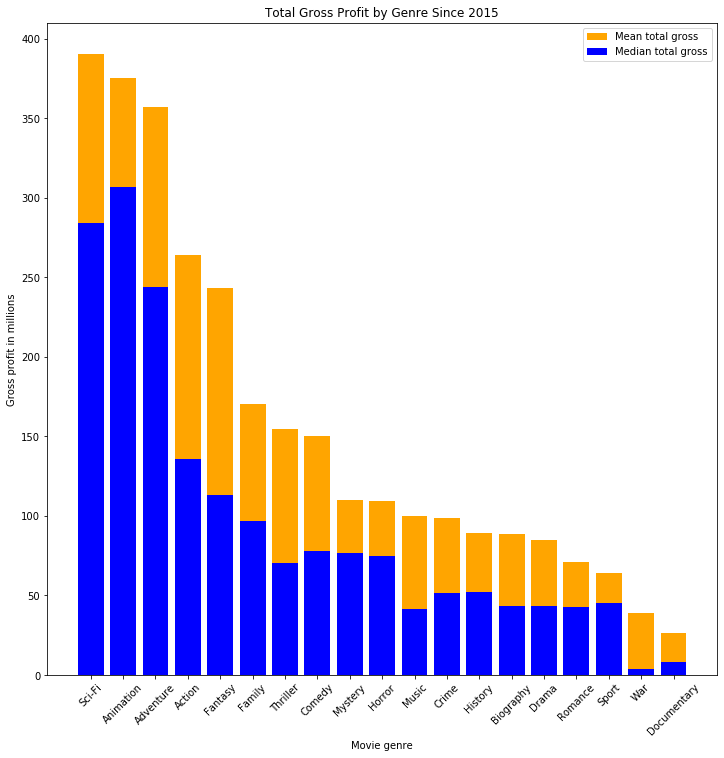

In [50]:
genre_df.sort_values(by='mean_total_gross', ascending =False, inplace=True)

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)

ax.bar(x='genre', height = 'mean_total_gross', data=genre_df, color='orange',label='Mean total gross')
ax.bar(x='genre', height = 'median_total_gross', data=genre_df, color='blue',label='Median total gross')

plt.xticks(rotation=45)
plt.legend();

ax.set_xlabel('Movie genre')
ax.set_ylabel('Gross profit in millions')
ax.set_title('Total Gross Profit by Genre Since 2015')
plt.savefig('total_gross.png')

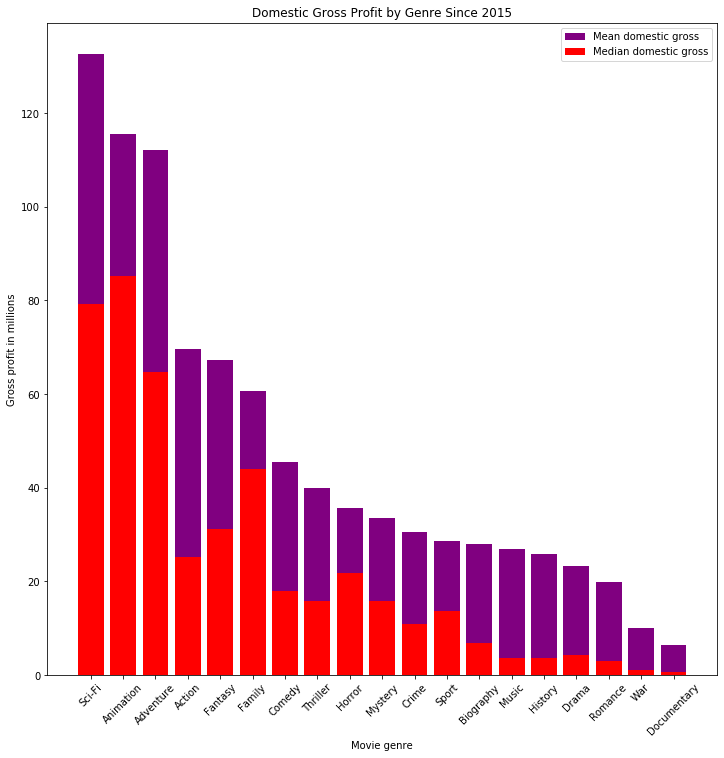

In [51]:
genre_df.sort_values(by='mean_dom_gross', ascending =False, inplace=True)

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)

ax.bar(x='genre', height = 'mean_dom_gross', data=genre_df, color='purple',label='Mean domestic gross')
ax.bar(x='genre', height = 'median_dom_gross', data=genre_df, color='red',label='Median domestic gross')

plt.xticks(rotation=45)
plt.legend();

ax.set_xlabel('Movie genre')
ax.set_ylabel('Gross profit in millions')
ax.set_title('Domestic Gross Profit by Genre Since 2015')
plt.savefig('dom_gross.png')

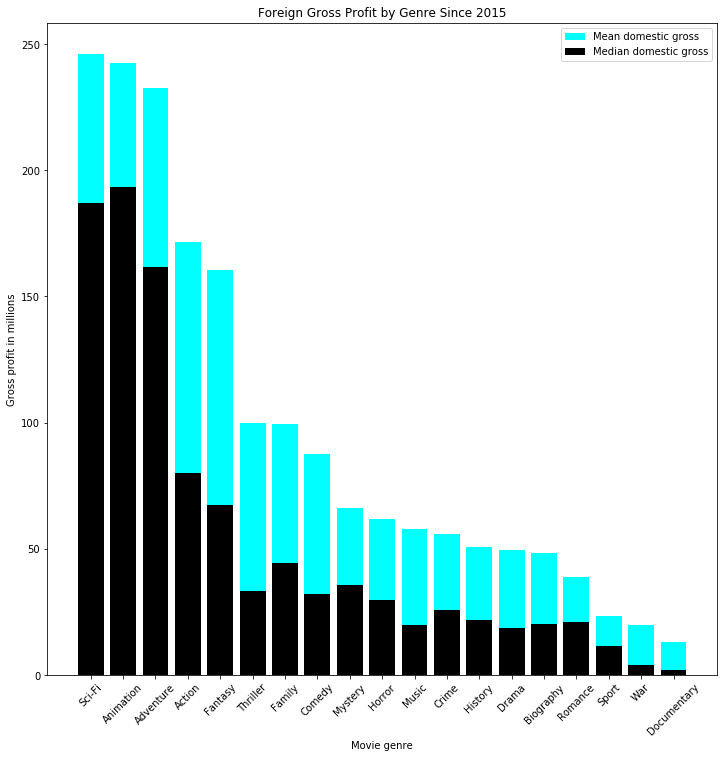

In [52]:
genre_df.sort_values(by='mean_foreign_gross', ascending =False, inplace=True)

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)

ax.bar(x='genre', height = 'mean_foreign_gross', data=genre_df, color='cyan',label='Mean domestic gross')
ax.bar(x='genre', height = 'median_foreign_gross', data=genre_df, color='black',label='Median domestic gross')

plt.xticks(rotation=45)
plt.legend();

ax.set_xlabel('Movie genre')
ax.set_ylabel('Gross profit in millions')
ax.set_title('Foreign Gross Profit by Genre Since 2015')
plt.savefig('foreign_gross.png')

## EDA of mutually exclusive genre categorizations (multiple categories)
#### Sci-Fi, Animation, Adventure, Action and Fantasy are the top grossing genres - here investigating the multiple categorizations within these global categories

In [53]:
bom_gross_title_basics_ratings.head()

,title,studio,domestic_gross,foreign_gross,year,domestic_gross_mm,foreign_gross_mm,total_gross,tconst,primary_title,...,Fantasy_movie,Thriller_movie,Mystery_movie,Music_movie,Talk-Show_movie,Sci-Fi_movie,Biography_movie,Crime_movie,averagerating,numvotes
0,Toy Story 3,BV,415000000.0,652000000,2010,415.0,652.0,1067.0,tt0435761,Toy Story 3,...,False,False,False,False,False,False,False,False,8.3,682218.0
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010,334.2,691.3,1025.5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010,296.0,664.3,960.3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Inception,WB,292600000.0,535700000,2010,292.6,535.7,828.3,tt1375666,Inception,...,False,False,False,False,False,True,False,False,8.8,1841066.0
4,Shrek Forever After,P/DW,238700000.0,513900000,2010,238.7,513.9,752.6,tt0892791,Shrek Forever After,...,False,False,False,False,False,False,False,False,6.3,167532.0


In [68]:
multi_genre_value_counts = bom_gross_title_basics_ratings.genres.value_counts()

In [69]:
mean_dom_multi = bom_gross_title_basics_ratings.groupby(['genres'])['domestic_gross_mm'].mean()

In [82]:
multi_genre_df = pd.DataFrame(
    {'n_obs': multi_genre_value_counts,
    'mean_dom_gross': mean_dom_multi,
    })
multi_genre_df

,n_obs,mean_dom_gross
Action,9,2.013767
"Action,Adventure",2,0.056400
"Action,Adventure,Animation",17,128.271765
"Action,Adventure,Biography",3,80.000000
"Action,Adventure,Comedy",26,115.789596
...,...,...
"Romance,Sci-Fi,Thriller",1,62.500000
"Romance,Thriller",1,0.507000
Sci-Fi,1,0.078000
Thriller,7,7.940586


In [83]:
multi_genre_df.reset_index(inplace = True)

In [86]:
multi_genre_df.rename(columns = {'index':'Genre'}, inplace=True)

In [87]:
multi_genre_df

,Genre,n_obs,mean_dom_gross
0,Action,9,2.013767
1,"Action,Adventure",2,0.056400
2,"Action,Adventure,Animation",17,128.271765
3,"Action,Adventure,Biography",3,80.000000
4,"Action,Adventure,Comedy",26,115.789596
...,...,...,...
257,"Romance,Sci-Fi,Thriller",1,62.500000
258,"Romance,Thriller",1,0.507000
259,Sci-Fi,1,0.078000
260,Thriller,7,7.940586


In [97]:
Action_df = multi_genre_df[multi_genre_df['Genre'].str.contains('Action')]

/Users/ericroberts/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Domestic Gross Profit Among Action Movies')

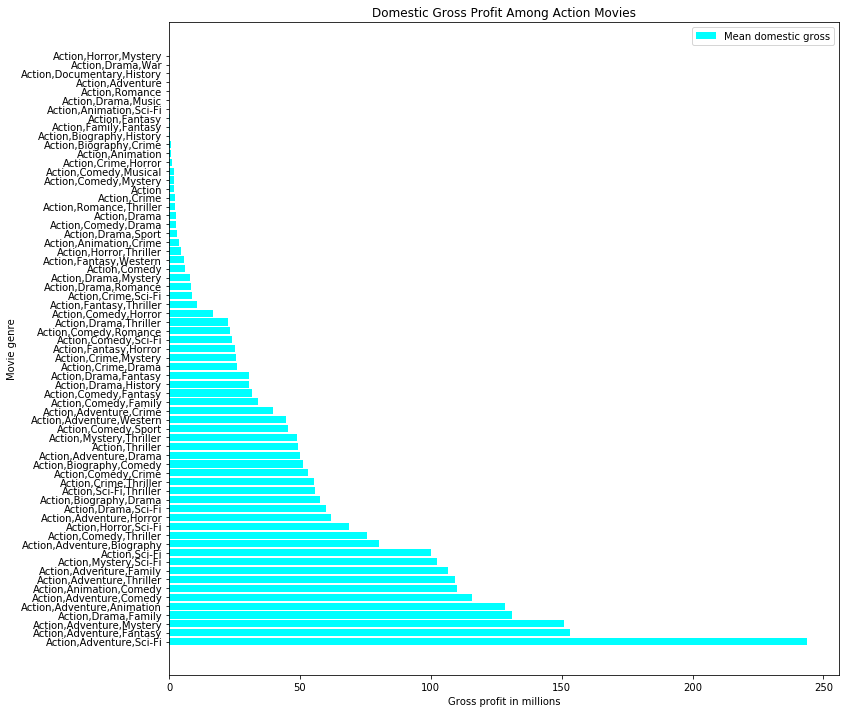

In [104]:
Action_df.sort_values(by='mean_dom_gross', ascending =False, inplace=True)

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)

ax.barh(y='Genre', width = 'mean_dom_gross', data=Action_df, color='cyan',label='Mean domestic gross')
# ax.bar(x='genre', height = 'median_foreign_gross', data=genre_df, color='black',label='Median domestic gross')

# plt.xticks(rotation=45)
plt.legend();

ax.set_ylabel('Movie genre')
ax.set_xlabel('Gross profit in millions')
ax.set_title('Domestic Gross Profit Among Action Movies')
# plt.savefig('foreign_gross.png')

In [109]:
Action_df.head(10)

,Genre,n_obs,mean_dom_gross
11,"Action,Adventure,Sci-Fi",45,243.724444
8,"Action,Adventure,Fantasy",28,153.060250
10,"Action,Adventure,Mystery",1,150.900000
42,"Action,Drama,Family",2,131.050000
2,"Action,Adventure,Animation",17,128.271765
4,"Action,Adventure,Comedy",26,115.789596
15,"Action,Animation,Comedy",3,109.933333
12,"Action,Adventure,Thriller",16,109.156125
7,"Action,Adventure,Family",5,106.720000
60,"Action,Mystery,Sci-Fi",1,102.400000


/Users/ericroberts/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'Domestic Gross Profit Among Sci-Fi Movies')

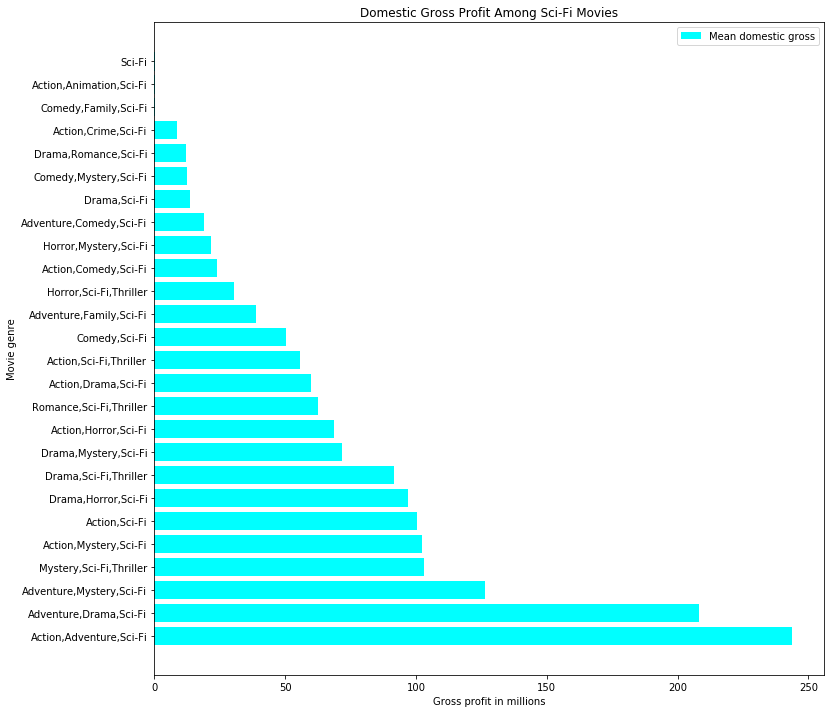

In [105]:
Sci_Fi_df = multi_genre_df[multi_genre_df['Genre'].str.contains('Sci-Fi')]

Sci_Fi_df.sort_values(by='mean_dom_gross', ascending =False, inplace=True)

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)

ax.barh(y='Genre', width = 'mean_dom_gross', data=Sci_Fi_df, color='cyan',label='Mean domestic gross')
# ax.bar(x='genre', height = 'median_foreign_gross', data=genre_df, color='black',label='Median domestic gross')

# plt.xticks(rotation=45)
plt.legend();

ax.set_ylabel('Movie genre')
ax.set_xlabel('Gross profit in millions')
ax.set_title('Domestic Gross Profit Among Sci-Fi Movies')

In [110]:
Sci_Fi_df.head(10)

,Genre,n_obs,mean_dom_gross
11,"Action,Adventure,Sci-Fi",45,243.724444
91,"Adventure,Drama,Sci-Fi",2,208.200000
98,"Adventure,Mystery,Sci-Fi",1,126.500000
254,"Mystery,Sci-Fi,Thriller",2,103.100000
60,"Action,Mystery,Sci-Fi",1,102.400000
64,"Action,Sci-Fi",1,100.200000
219,"Drama,Horror,Sci-Fi",3,96.900000
234,"Drama,Sci-Fi,Thriller",3,91.486000
227,"Drama,Mystery,Sci-Fi",3,71.633333
58,"Action,Horror,Sci-Fi",6,68.716667


/Users/ericroberts/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'Domestic Gross Profit Among Animation Movies')

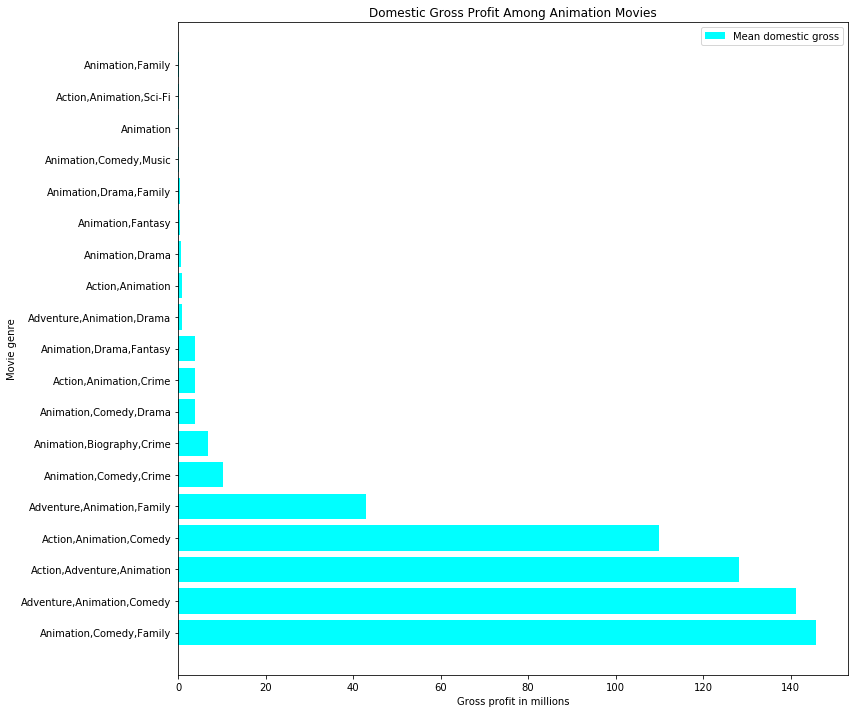

In [106]:
Animation_df = multi_genre_df[multi_genre_df['Genre'].str.contains('Animation')]

Animation_df.sort_values(by='mean_dom_gross', ascending =False, inplace=True)

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)

ax.barh(y='Genre', width = 'mean_dom_gross', data=Animation_df, color='cyan',label='Mean domestic gross')
# ax.bar(x='genre', height = 'median_foreign_gross', data=genre_df, color='black',label='Median domestic gross')

# plt.xticks(rotation=45)
plt.legend();

ax.set_ylabel('Movie genre')
ax.set_xlabel('Gross profit in millions')
ax.set_title('Domestic Gross Profit Among Animation Movies')

In [112]:
Animation_df.head(10)

,Genre,n_obs,mean_dom_gross
105,"Animation,Comedy,Family",6,145.866917
67,"Adventure,Animation,Comedy",68,141.366275
2,"Action,Adventure,Animation",17,128.271765
15,"Action,Animation,Comedy",3,109.933333
69,"Adventure,Animation,Family",3,42.967000
103,"Animation,Comedy,Crime",1,10.100000
102,"Animation,Biography,Crime",1,6.700000
104,"Animation,Comedy,Drama",1,3.800000
16,"Action,Animation,Crime",1,3.800000
109,"Animation,Drama,Fantasy",1,3.700000


/Users/ericroberts/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'Domestic Gross Profit Among Adventure Movies')

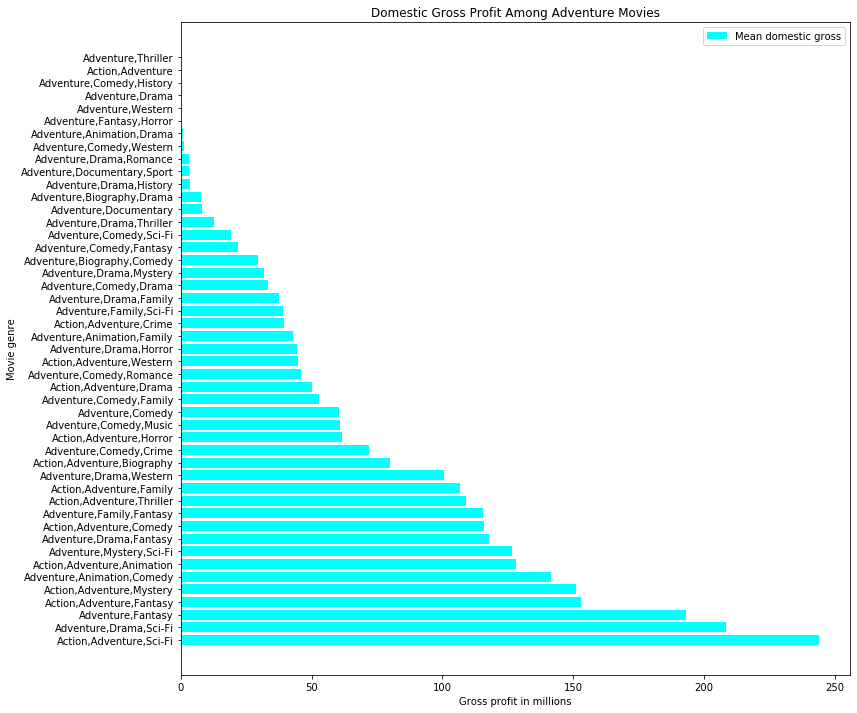

In [107]:
Adventure_df = multi_genre_df[multi_genre_df['Genre'].str.contains('Adventure')]

Adventure_df.sort_values(by='mean_dom_gross', ascending =False, inplace=True)

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)

ax.barh(y='Genre', width = 'mean_dom_gross', data=Adventure_df, color='cyan',label='Mean domestic gross')
# ax.bar(x='genre', height = 'median_foreign_gross', data=genre_df, color='black',label='Median domestic gross')

# plt.xticks(rotation=45)
plt.legend();

ax.set_ylabel('Movie genre')
ax.set_xlabel('Gross profit in millions')
ax.set_title('Domestic Gross Profit Among Adventure Movies')

/Users/ericroberts/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'Domestic Gross Profit Among Fantasy Movies')

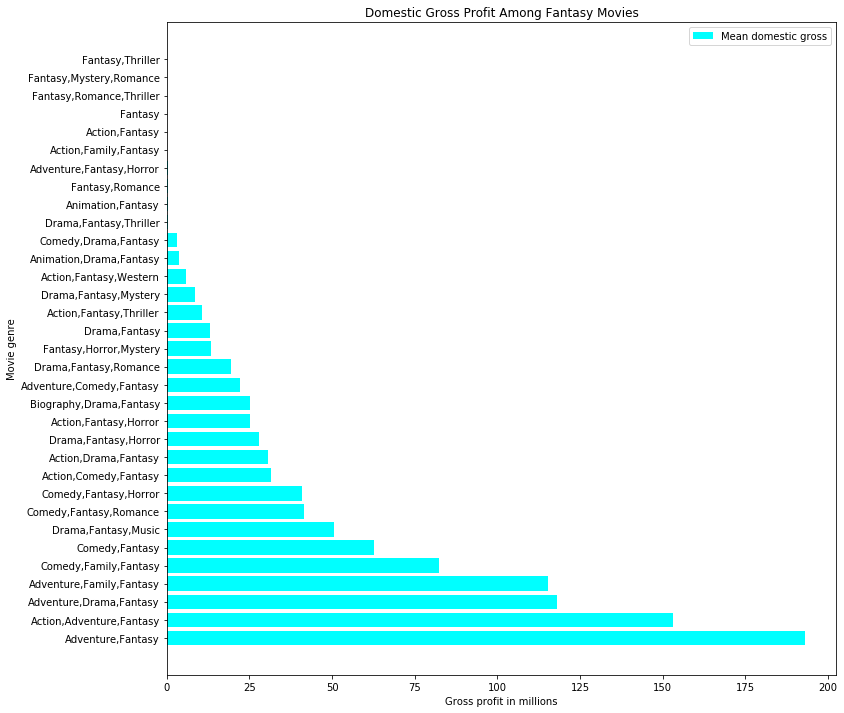

In [108]:
Fantasy_df = multi_genre_df[multi_genre_df['Genre'].str.contains('Fantasy')]

Fantasy_df.sort_values(by='mean_dom_gross', ascending =False, inplace=True)

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)

ax.barh(y='Genre', width = 'mean_dom_gross', data=Fantasy_df, color='cyan',label='Mean domestic gross')
# ax.bar(x='genre', height = 'median_foreign_gross', data=genre_df, color='black',label='Median domestic gross')

# plt.xticks(rotation=45)
plt.legend();

ax.set_ylabel('Movie genre')
ax.set_xlabel('Gross profit in millions')
ax.set_title('Domestic Gross Profit Among Fantasy Movies')

In [113]:
Fantasy_df.head(10)

,Genre,n_obs,mean_dom_gross
96,"Adventure,Fantasy",3,192.900000
8,"Action,Adventure,Fantasy",28,153.060250
86,"Adventure,Drama,Fantasy",5,117.880000
94,"Adventure,Family,Fantasy",8,115.437500
155,"Comedy,Family,Fantasy",4,82.300000
158,"Comedy,Fantasy",5,62.672200
209,"Drama,Fantasy,Music",1,50.500000
160,"Comedy,Fantasy,Romance",2,41.550000
159,"Comedy,Fantasy,Horror",3,40.829433
26,"Action,Comedy,Fantasy",1,31.500000


### Considerations:
1) Far too many categories to present this enmasse
2) Highest grossing multi-genre tend to be the cross-classification of high grossing individual genres
3) Means based on very few observations for the majority of categories of multi genre
4) Will restrict to those with at least 10 observations and assess.

In [114]:
multi_genre_df.sort_values(by='n_obs', ascending =False)

,Genre,n_obs,mean_dom_gross
203,Drama,100,9.560415
151,"Comedy,Drama,Romance",91,16.925020
143,"Comedy,Drama",71,18.023437
67,"Adventure,Animation,Comedy",68,141.366275
229,"Drama,Romance",60,15.328708
...,...,...,...
187,"Crime,Romance,Thriller",1,0.255000
119,"Biography,Documentary,History",1,18.000000
185,"Crime,Mystery",1,0.050200
121,"Biography,Documentary,Sport",1,0.383000


In [116]:
ten_obs_df = multi_genre_df[multi_genre_df['n_obs'] >= 10]

In [117]:
ten_obs_df.shape

(43, 3)

In [119]:
ten_obs_df.sort_values(by='mean_dom_gross', ascending=False)

,Genre,n_obs,mean_dom_gross
11,"Action,Adventure,Sci-Fi",45,243.724444
8,"Action,Adventure,Fantasy",28,153.060250
67,"Adventure,Animation,Comedy",68,141.366275
2,"Action,Adventure,Animation",17,128.271765
4,"Action,Adventure,Comedy",26,115.789596
12,"Action,Adventure,Thriller",16,109.156125
39,"Action,Crime,Thriller",30,55.355773
135,"Comedy,Crime",10,54.170400
23,"Action,Comedy,Crime",34,53.206500
6,"Action,Adventure,Drama",35,50.032265


/Users/ericroberts/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


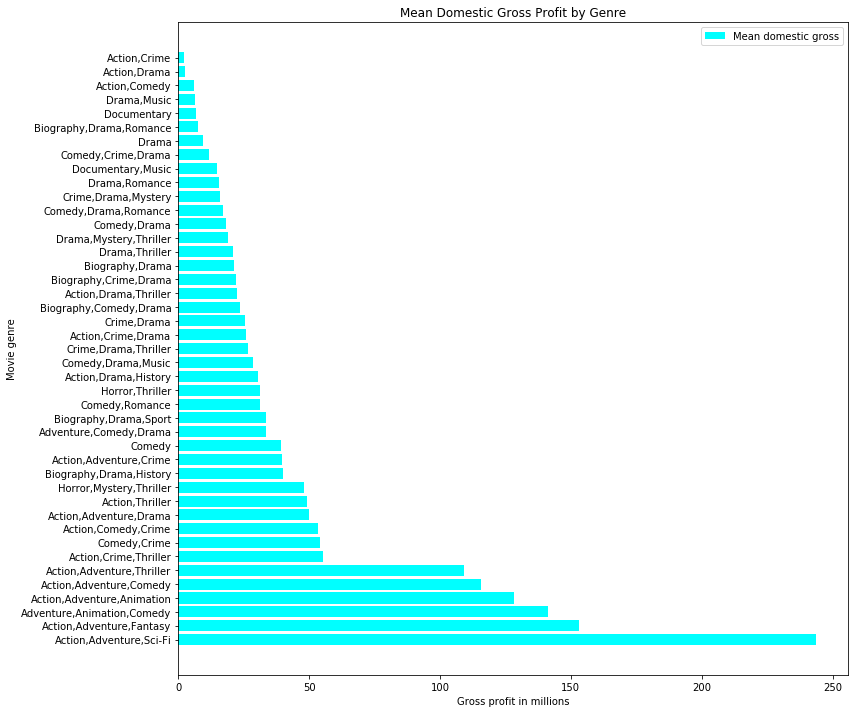

In [121]:
ten_obs_df.sort_values(by='mean_dom_gross', ascending=False, inplace=True)

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)

ax.barh(y='Genre', width = 'mean_dom_gross', data=ten_obs_df, color='cyan',label='Mean domestic gross')
# ax.bar(x='genre', height = 'median_foreign_gross', data=genre_df, color='black',label='Median domestic gross')

# plt.xticks(rotation=45)
plt.legend();

ax.set_ylabel('Movie genre')
ax.set_xlabel('Gross profit in millions')
ax.set_title('Mean Domestic Gross Profit by Genre')
plt.savefig('multigenre_domestic_gross.png')